### scikit-learn多项式回归与Pipline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size =100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
X2 = poly.transform(X)

In [6]:
X2.shape

(100, 3)

In [8]:
X2[:5,:]

array([[ 1.        ,  1.43816887,  2.06832971],
       [ 1.        , -2.80707165,  7.87965123],
       [ 1.        ,  0.83178625,  0.69186837],
       [ 1.        ,  0.19573675,  0.03831287],
       [ 1.        ,  1.00808734,  1.01624008]])

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

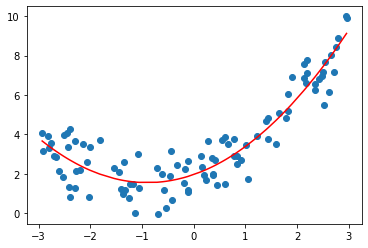

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [11]:
lin_reg2.coef_

array([0.        , 0.91403242, 0.50937946])

In [12]:
lin_reg2.intercept_

1.9620445296603368

### 关于PolynomialFeatures

In [13]:
X = np.arange(1,11).reshape(-1,2)

In [14]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [16]:
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
X2 = poly.transform(X)

In [17]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipline

In [18]:
x = np.random.uniform(-3, 3, size =100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size =100)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('std_scaler',StandardScaler()),
    ('lin_reg',LinearRegression())
])

In [20]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

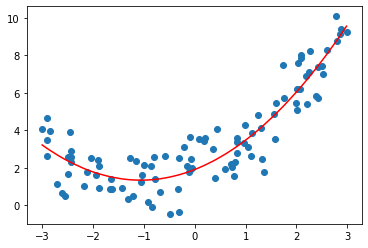

In [21]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()